In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [36]:
# Train aur Test dataset load karo
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train (1).csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test (1).csv")
# Pehle 5 rows check
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
print(train.shape)
print(train.info())
print(train.describe())


(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [ ]:
sns.histplot(train['SalePrice'], kde=True)
plt.show()

In [38]:
# numeric columns
numeric_df = train.select_dtypes(include=[np.number])

# Features & Target
X = numeric_df.drop("SalePrice", axis=1)
y = numeric_df["SalePrice"]


In [40]:
X = X.fillna(X.median())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 1360121073.2180183
RMSE: 36879.81932192752
R² Score: 0.8226775450640444


In [42]:
# Coefficients - Feature Importance
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coeff_df.head(10))   # Top positive
print(coeff_df.tail(10))   # Top negative


         Feature   Coefficient
4    OverallQual  17929.555587
26    GarageCars  12412.323576
17  BsmtFullBath  11311.462633
23  TotRmsAbvGrd   5117.287025
24    Fireplaces   4766.784112
5    OverallCond   4200.298303
19      FullBath   2891.164389
6      YearBuilt    267.803787
7   YearRemodAdd    167.713808
25   GarageYrBlt    136.853442
         Feature  Coefficient
29   OpenPorchSF    -5.629843
33      PoolArea   -18.563651
2    LotFrontage  -131.161356
35        MoSold  -148.444857
1     MSSubClass  -202.017563
36        YrSold  -525.090384
18  BsmtHalfBath -1150.691762
20      HalfBath -2325.882339
21  BedroomAbvGr -8632.877862
22  KitchenAbvGr -9532.667240


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


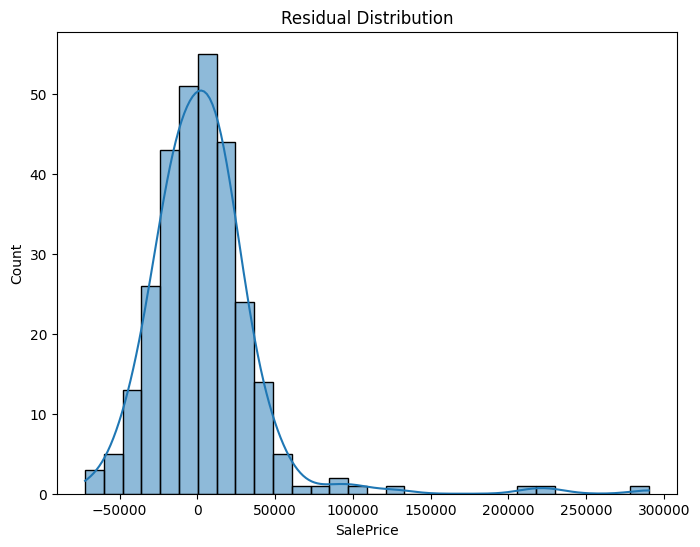

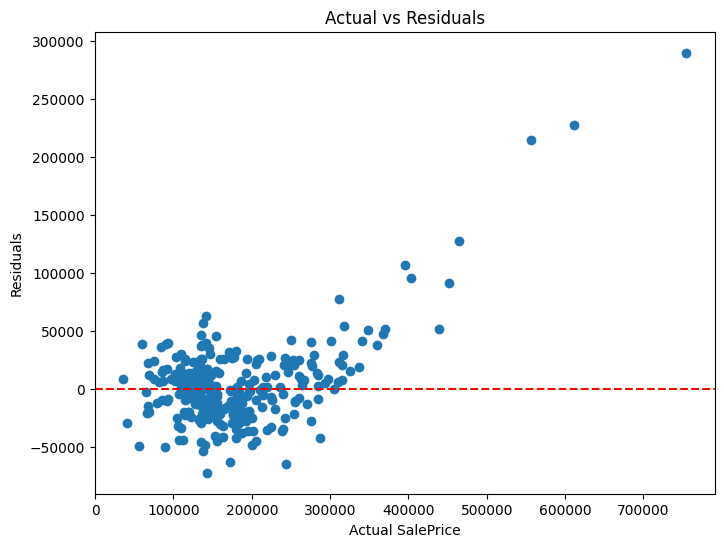

In [43]:
#  Residual Analysis (model ki errors ka distribution check karna) 
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Residuals")
plt.title("Actual vs Residuals")
plt.show()


In [44]:
scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())


Cross-validated R² scores: [0.8452744  0.81367353 0.82233332 0.81781877 0.62865292]
Mean R²: 0.7855505881450737


In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("RandomForest R²:", r2_score(y_test, y_pred_rf))
print("RandomForest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


RandomForest R²: 0.8886458468973654
RandomForest RMSE: 29225.377308467134
